- Load df = pd.read_csv('data/frauds.csv')
- 'Label' column denotes frauds (the label column indicates whether the transaction is fraudulent
- Use RandomForestClassifier perform 5CV experiment, compute accuracy
- Compute feature importances
- Plot SHAP beeswarm plot
- Bonus: create PCA visualisation (a scatterplot projecting data on first two principal components with colours as classes)

Accuracy: 0.93 (0.00) [[0.93092105 0.93092105 0.93421053 0.93421053 0.93092105]]
                                 importance
Transaction Amount                 0.089853
Source account age                 0.345647
Target account age                 0.107100
Transaction Time                   0.033974
Location Consistency               0.269042
Device Consistency                 0.016139
Number of Previous Transactions    0.138245


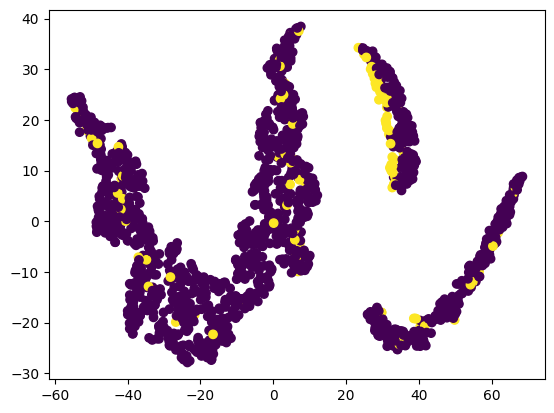

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv('data/frauds.csv')
labels = df['Label']
df = df.drop(columns=['Label'])

cls = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2) 
scores = cross_val_score(cls,df, labels, cv=5)
print (f"Accuracy: {scores.mean():0.2f} ({scores.std():0.2f}) [{scores}]")

cls.fit(df, labels)
feature_importances = pd.DataFrame(cls.feature_importances_,index=df.columns)
feature_importances.columns = ['importance']
print (feature_importances)


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = TSNE(n_components=2)
Xpca = pca.fit_transform(df)

plt.scatter(Xpca.T[0], Xpca.T[1], c=labels)
plt.show()